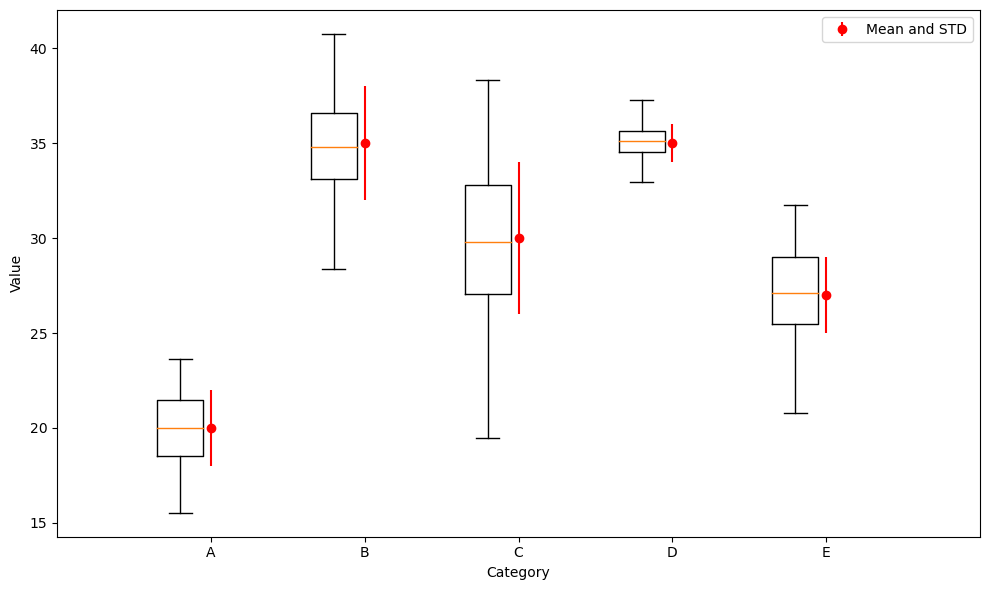

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 假設數據
means = [20, 35, 30, 35, 27]
stds = [2, 3, 4, 1, 2]
categories = ['A', 'B', 'C', 'D', 'E']

# 假設的箱形圖數據
data = [np.random.normal(mean, std, 100) for mean, std in zip(means, stds)]

fig, ax1 = plt.subplots(figsize=(10, 6))

# 繪製箱形圖
bp = ax1.boxplot(data, positions=np.array(range(len(data)))*2.0-0.4, sym='', widths=0.6)

# 繪製錯誤條
for i in range(len(means)):
    ax1.errorbar(i*2, means[i], yerr=stds[i], fmt='o', color='red', label='Mean and STD' if i==0 else "")

# 設置軸標籤
ax1.set_xticks(range(0, len(categories) * 2, 2))
ax1.set_xticklabels(categories)
ax1.set_xlim(-2, len(categories)*2)
ax1.set_xlabel('Category')
ax1.set_ylabel('Value')

# 圖例
handles, labels = ax1.get_legend_handles_labels()
if handles:
    ax1.legend(handles, labels)

plt.tight_layout()
plt.show()


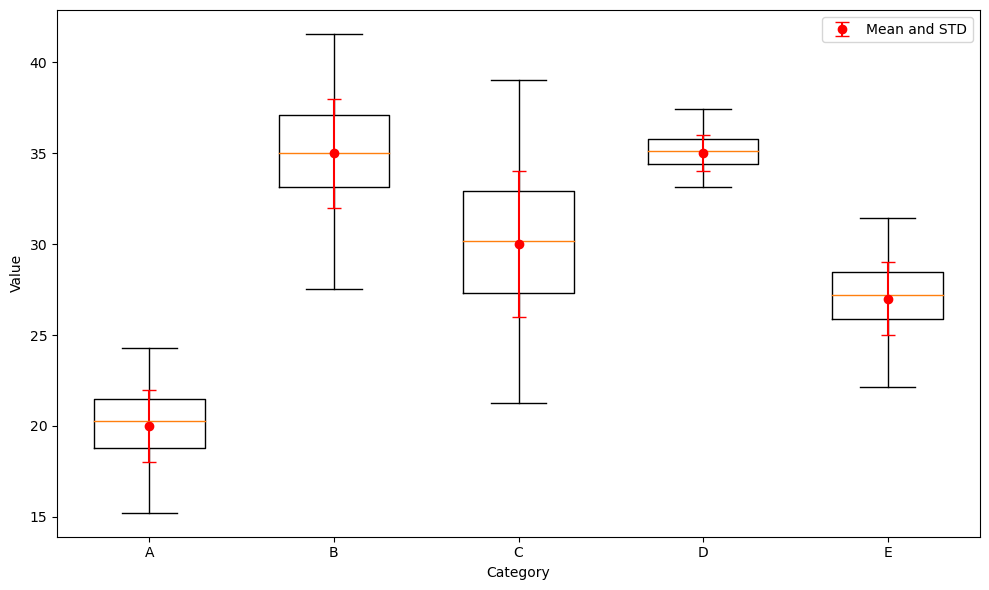

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 假设数据
means = [20, 35, 30, 35, 27]
stds = [2, 3, 4, 1, 2]
categories = ['A', 'B', 'C', 'D', 'E']

# 假设的箱形图数据
data = [np.random.normal(mean, std, 100) for mean, std in zip(means, stds)]

fig, ax = plt.subplots(figsize=(10, 6))

# 繪製箱形图
bp = ax.boxplot(data, positions=np.arange(len(data)), sym='', widths=0.6)

# 在相同的位置繪製錯誤条
for i in range(len(means)):
    ax.errorbar(i, means[i], yerr=stds[i], fmt='o', color='red', capsize=5, label='Mean and STD' if i == 0 else "")

# 设置轴标签
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)
ax.set_xlabel('Category')
ax.set_ylabel('Value')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
if handles:
    ax.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import argparse

def calculate_mean_std(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    fluency_scores = []
    flexibility_scores = []
    originality_scores = []
    elaboration_scores = []

    for item in data:
        if 'fluency' in item:
            for fluency in item['fluency']:
                if 'average_fluency' in fluency:
                    fluency_scores.append(fluency['average_fluency'])
        if 'flexibility' in item:
            for flexibility in item['flexibility']:
                if 'average_flexibility' in flexibility:
                    flexibility_scores.append(flexibility['average_flexibility'])
        if 'originality' in item:
            for originality in item['originality']:
                if 'average_originality' in originality:
                    originality_scores.append(originality['average_originality'])
        if 'elaboration' in item:
            for elaboration in item['elaboration']:
                if 'average_elaboration' in elaboration:
                    elaboration_scores.append(elaboration['average_elaboration'])

    averages = {
        "fluency": {"mean": np.mean(fluency_scores), "std": np.std(fluency_scores)},
        "flexibility": {"mean": np.mean(flexibility_scores), "std": np.std(flexibility_scores)},
        "originality": {"mean": np.mean(originality_scores), "std": np.std(originality_scores)},
        "elaboration": {"mean": np.mean(elaboration_scores), "std": np.std(elaboration_scores)}
    }
    return fluency_scores, flexibility_scores, originality_scores, elaboration_scores, averages


def plot_score(scores_dict, category, custom_xtick_labels=None, output_name=None, title=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    data_to_plot = [scores for scores in scores_dict.values()]
    ax.boxplot(data_to_plot, patch_artist=True)

    new_xtick_labels = []
    for scores in data_to_plot:
        mean = np.mean(scores)
        std = np.std(scores)
        label = f'Mean: {mean:.2f}\nStd: {std:.2f}'
        new_xtick_labels.append(label)

    if custom_xtick_labels and len(custom_xtick_labels) == len(scores_dict):
        combined_labels = [f'{custom}\n\n{new}' for custom, new in zip(custom_xtick_labels, new_xtick_labels)]
        ax.set_xticklabels(combined_labels, ha='center',fontsize=12)
    else:
        original_labels = list(scores_dict.keys())
        combined_labels = [f'{orig}\n\n{new}' for orig, new in zip(original_labels, new_xtick_labels)]
        ax.set_xticklabels(combined_labels, rotation=45, ha='right',fontsize=12)

    plt.title(f'{category}: {title}', fontsize = 20)
    plt.ylabel('Score')
    plt.xticks()
    plt.tight_layout()  # Adjust layout to not cut off labels

    # Add mean and standard deviation figures
    for i, scores in enumerate(data_to_plot):
        mean = np.mean(scores)
        std = np.std(scores)
        ax.axhline(mean, color='r', linestyle='-', linewidth=1.5)
        ax.axvspan(mean-std, mean+std, color='r', alpha=0.2)

    image_path = os.path.join(
                Path(__file__).parent, 'img', 'boxplot', 
                f"{category}_{output_name}.png"
            )
    # plt.savefig(image_path)
    plt.show()
    print(f"Boxplot for {category} saved at {image_path}")
    plt.close(fig)

def plot_combined_subplots(scores_dicts, custom_xtick_labels, output_name, title):
    fig, axs = plt.subplots(2, 2, figsize=(20, 12))
    categories = ["Fluency", "Flexibility", "Originality", "Elaboration"]

    for i, (ax, category) in enumerate(zip(axs.flatten(), categories)):
        scores = scores_dicts[category]
        data_to_plot = [score for score in scores.values()]
        ax.boxplot(data_to_plot, patch_artist=True)
        
        new_xtick_labels = []
        for score in data_to_plot:
            mean = np.mean(score)
            std = np.std(score)
            label = f'Mean: {mean:.2f}\nStd: {std:.2f}'
            new_xtick_labels.append(label)

        if custom_xtick_labels and len(custom_xtick_labels) == len(scores):
            combined_labels = [f'{custom}\n\n{new}' for custom, new in zip(custom_xtick_labels, new_xtick_labels)]
            ax.set_xticklabels(combined_labels, ha='center', fontsize=12)
        else:
            original_labels = list(scores.keys())
            combined_labels = [f'{orig}\n\n{new}' for orig, new in zip(original_labels, new_xtick_labels)]
            ax.set_xticklabels(combined_labels, rotation=45, ha='right', fontsize=12)

        ax.set_title(f'{category}: {title}', fontsize=20)
        ax.set_ylabel('Score')

    plt.tight_layout()  # Adjust layout to not cut off labels
    combined_image_path = os.path.join(
                Path(__file__).parent, 'img', 'boxplot',
                f"Combined_{output_name}.png"
            )
    plt.savefig(combined_image_path)
    print(f"Combined plot saved at {combined_image_path}")
    plt.close(fig)



def main(input_files, output_name, custom_labels, title):
    all_fluency_scores = {}
    all_flexibility_scores = {}
    all_originality_scores = {}
    all_elaboration_scores = {}

    print("CUSTOM LABEL:", custom_labels, "\n", "OUTPUT_NAME:", output_name, "\n", "TITLE:", title, "\n", "INPUT_FILES:", input_files, "\n")

    for file_name in input_files:
        file_path = file_name
        fluency_scores, flexibility_scores, originality_scores, elaboration_scores, averages = calculate_mean_std(file_path)

        # Store scores from each file
        all_fluency_scores[file_name] = fluency_scores
        all_flexibility_scores[file_name] = flexibility_scores
        all_originality_scores[file_name] = originality_scores
        all_elaboration_scores[file_name] = elaboration_scores

        print("File: ", file_name)
        print("Average: ", averages, "\n")

    scores_dicts = {
        "Fluency": all_fluency_scores,
        "Flexibility": all_flexibility_scores,
        "Originality": all_originality_scores,
        "Elaboration": all_elaboration_scores
    }

    for category, scores_dict in scores_dicts.items():
        plot_score(scores_dict, category, custom_labels, output_name, title)

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Process multiple JSON files for scoring analysis.")
    parser.add_argument("-i", "--input_files", nargs='+', required=True, help="File paths of the JSON files")
    parser.add_argument("-o", "--output_name", required=True, help="Give me the name of the output file without using json")
    parser.add_argument("-l", "--custom_labels", nargs='+', required=False, help="Give me the custom labels for the boxplot")
    parser.add_argument("-t", "--title", required=False, help="Give me the title of the plot")
    args = parser.parse_args()

    main(args.input_files, args.output_name, args.custom_labels, args.title)
